In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (16, 6)

## Music files

### Classical


In [2]:
classical, classicalSR = librosa.load('classical.wav')
ipd.Audio(classical, rate=classicalSR)

### Simple

In [3]:
simple, simpleSR = librosa.load('simple.wav')
ipd.Audio(simple, rate=simpleSR)

### Blues

In [4]:
blues, bluesSR = librosa.load('blues.wav')
ipd.Audio(blues, rate=bluesSR)

### Sampling rate:

In [5]:
print("blues: " + str(bluesSR) + " Hz")
print("classical: " + str(classicalSR) + " Hz")
print("simple: " + str(simpleSR) + " Hz")

blues: 22050 Hz
classical: 22050 Hz
simple: 22050 Hz


## Time Domain Representation

### Classical recording waveform

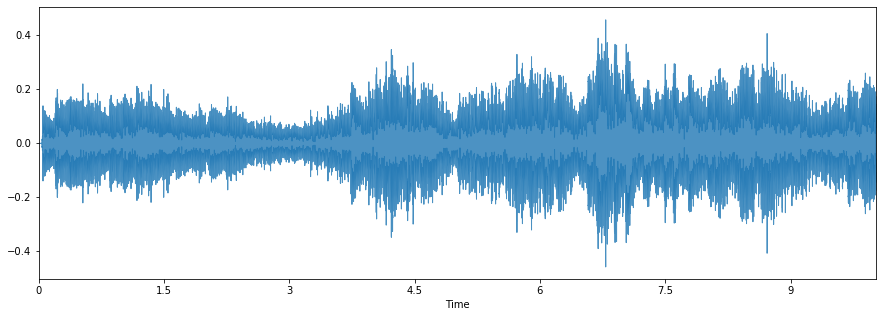

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(classical, classicalSR, alpha=0.8)

### Blues recording waveform:

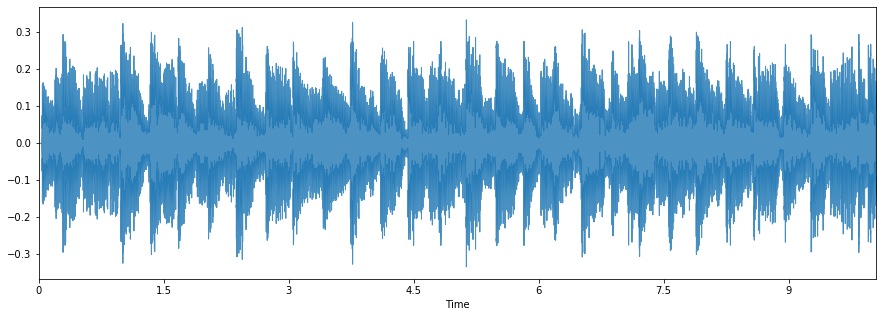

In [7]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(blues, bluesSR, alpha=0.8)

### Simple recording waveform:

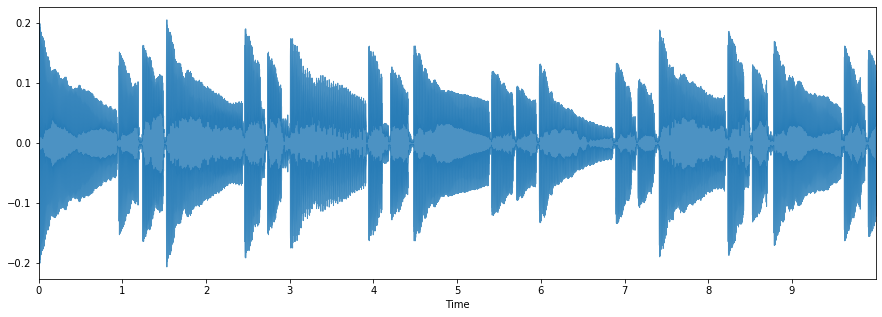

In [8]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(simple, simpleSR, alpha=0.8)

## Energy of signal


### Energy of continuous time signal
Is defined as the area under the squared magnitude of the considered signal

\begin{align}
E_{s} =\int _{-\infty }^{\infty }{|x(t)|^{2}}dt
\end{align}

### Energy of discrete time signal

\begin{align}
E_{s} = \sum_n \left| x(n) \right|^2
\end{align}

### Segmentation
After audio signal is segmented each segment is mapped with root mean square function

\begin{align}
\sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 }
\end{align}

> Introduction to Audio Analysis
> --<cite>Theodoros Giannakopoulos, Aggelos Pikrakis</cite>

In [9]:
def energy(segment):
    return sum(numpy.power(segment,2))

def rmse(segment):
    return numpy.sqrt(numpy.mean(numpy.power(segment,2)))

def segmentsignal(signal, segmentSize, hopSize, mapFunction):
        return numpy.array([
        mapFunction(signal[i:i+segmentSize])
        for i in range(0, signal.size, hopSize)
    ])

def plotSegmentation(energy, rmse):
    fig, (energyPlot, rmsePlot) = plt.subplots(1, 2, figsize=(30,5))
    energyPlot.set_title("Segmented signal Energy")
    energyPlot.plot(energy)
    rmsePlot.set_title("Segmented signal RMSE")
    rmsePlot.plot(rmse)
    
def plotSegmentsWithWaveform(signal, energy, rmse, sampleRate, hopSize):
    segments = range(energy.size)
    segmentsOverTime = librosa.frames_to_time(segments, sr=sampleRate, hop_length=hopSize)
    librosa.display.waveplot(signal, sr=sampleRate, alpha=0.5)
    plt.plot(segmentsOverTime, energy/energy.max(), 'r--')
    plt.plot(segmentsOverTime, rmse/rmse.max(), 'g:')
    plt.legend(('Energy', 'RMSE'))

In [10]:
SEGMENT_SIZE = 1024
HOP_SIZE = 512

classicalEnergy = segmentsignal(classical, SEGMENT_SIZE, HOP_SIZE, energy)
classicalRMSE = segmentsignal(classical, SEGMENT_SIZE, HOP_SIZE, rmse)

bluesEnergy = segmentsignal(blues, SEGMENT_SIZE, HOP_SIZE, energy)
bluesRMSE = segmentsignal(blues, SEGMENT_SIZE, HOP_SIZE, rmse)

simpleEnergy = segmentsignal(simple, SEGMENT_SIZE, HOP_SIZE, energy)
simpleRMSE = segmentsignal(simple, SEGMENT_SIZE, HOP_SIZE, rmse)

### Energy and EMSE for Classical recording:

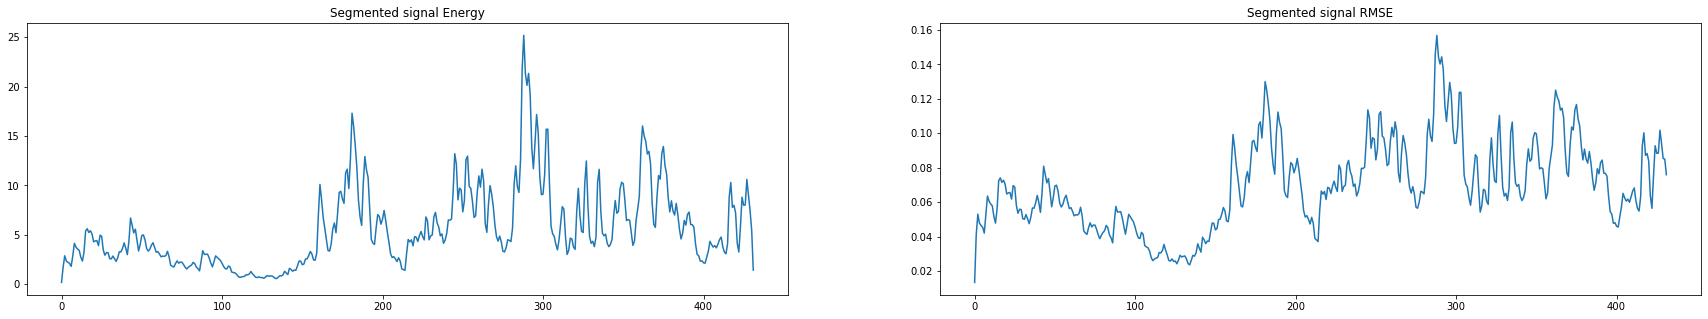

In [11]:
plotSegmentation(classicalEnergy, classicalRMSE)

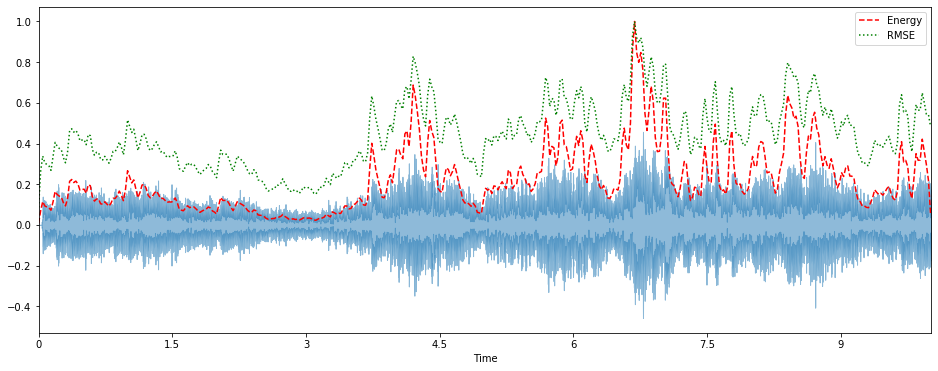

In [12]:
plotSegmentsWithWaveform(classical, classicalEnergy, classicalRMSE, classicalSR, HOP_SIZE)

### Energy and EMSE for Blues recording:

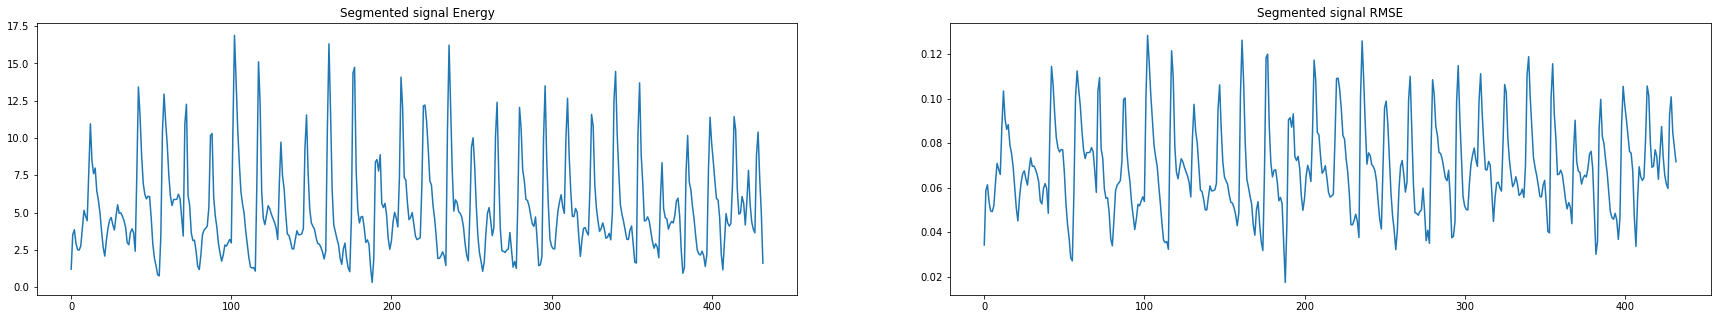

In [13]:
plotSegmentation(bluesEnergy, bluesRMSE)

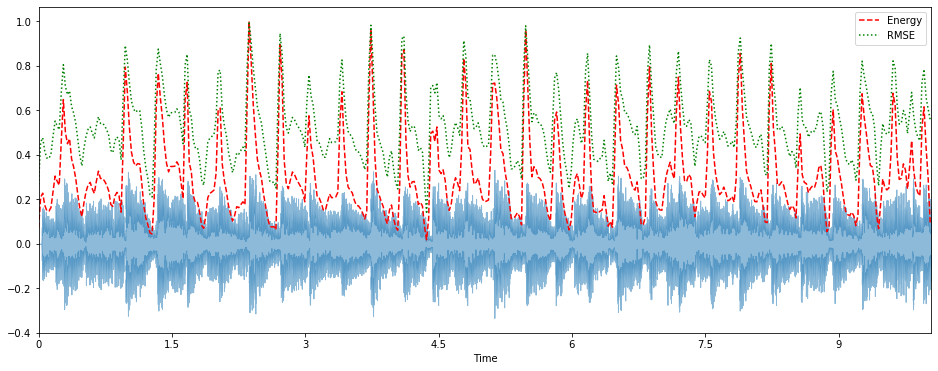

In [14]:
plotSegmentsWithWaveform(blues, bluesEnergy, bluesRMSE, bluesSR, HOP_SIZE)

### Energy and EMSE for Simple recording:

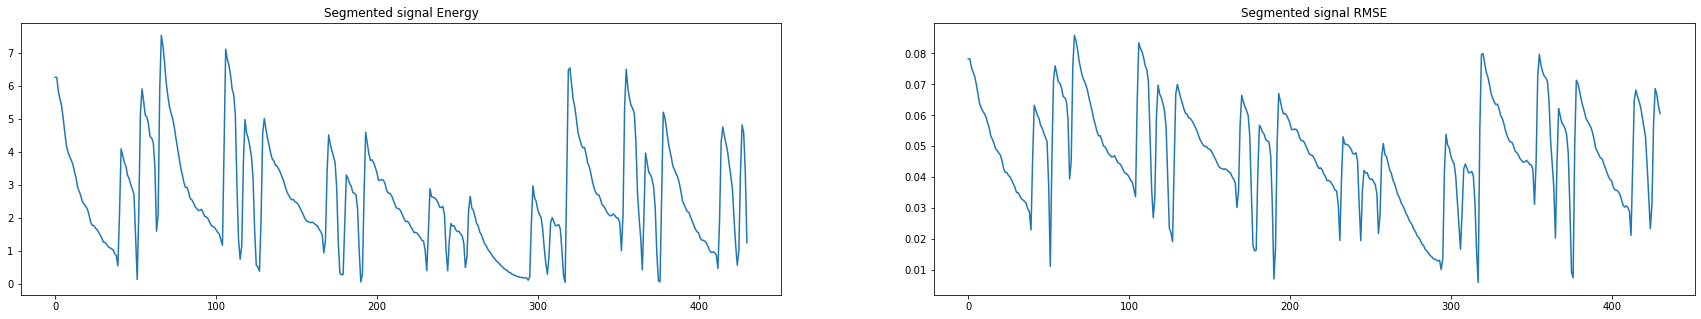

In [15]:
plotSegmentation(simpleEnergy, simpleRMSE)

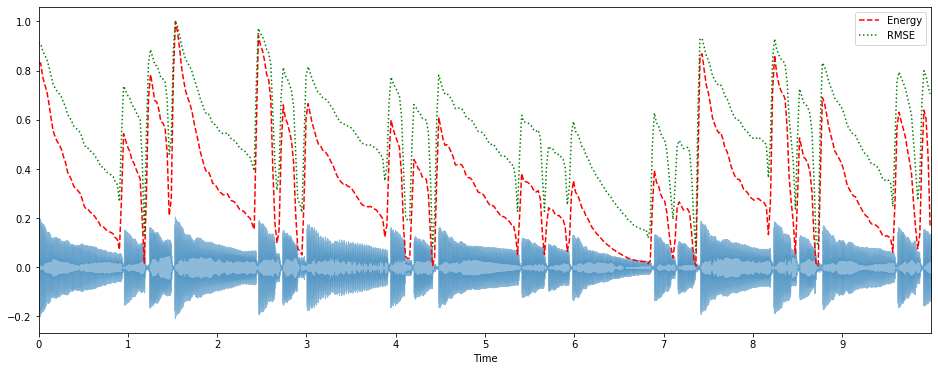

In [16]:
plotSegmentsWithWaveform(simple, simpleEnergy, simpleRMSE, simpleSR, HOP_SIZE)

## Zero-crossing rate

Zero crossing rate of any signal frame is the rate at which a signal changes its sign during the frame. It denotes the number of times the signal changes value, from positive to negative and vice versa, divided by the total length of the frame.

Can be used for rhythm detection and percussive sounds classification.

### Zero crossing rate for a frame is computed as:
1. Samples of i_th frame:
\begin{align}
x_i(n) = 0,1,...N-1
\end{align}
2. Zero crossing rate:
\begin{align}
Z(i) = \frac{1}{2N}\sum_{n=0}^{N-1}|sgn[x_i(n)] - sgn[x_i(n - 1)]|
\end{align}
3. Sign function:
\begin{align}
sgn[x_i(n)] = 
\begin{cases}
1, x_i(n) \ge 0\\
-1, x_i(n) < 0
\end{cases}
\end{align}

> Musical Instrument Recognition using Zero Crossing Rate and Short-time Energy
> -- <cite>Sumit Kumar Banchhor, Arif Khan</cite>
>
> ON THE USE OF ZERO-CROSSING RATE FOR AN APPLICATION OF CLASSIFICATION OF PERCUSSIVE SOUNDS
> -- <cite>Fabien Gouyon, François Pachet, Olivier Delerue</cite>

In [17]:
classicalZC = librosa.feature.zero_crossing_rate(classical, frame_length = 1024, hop_length = 512)
bluesZC = librosa.feature.zero_crossing_rate(blues, frame_length = 1024, hop_length = 512)
simpleZC = librosa.feature.zero_crossing_rate(simple, frame_length = 1024, hop_length = 512)

def plotZeroCrossingWithWaveform(signal, zcr, sampleRate, hopSize):
    segments = range(zcr[0].size)
    segmentsOverTime = librosa.frames_to_time(segments, sr=sampleRate, hop_length=hopSize)
    librosa.display.waveplot(signal, sr=sampleRate, alpha=0.5)
    plt.plot(segmentsOverTime, zcr[0]/zcr[0].max(), 'r--')
    plt.legend(('ZeroCrossingsRate', 'Signal'))

### Zero crossing rate for simple recording:

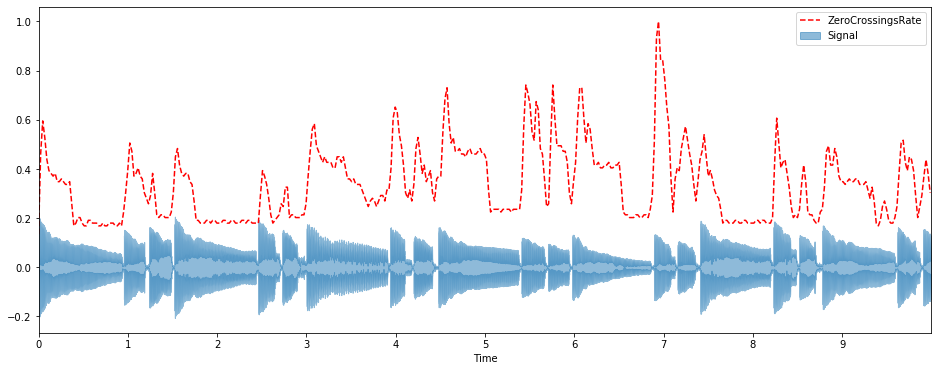

In [18]:
plotZeroCrossingWithWaveform(simple, simpleZC, simpleSR, 512)

### Zero crossing rate for blues recording:

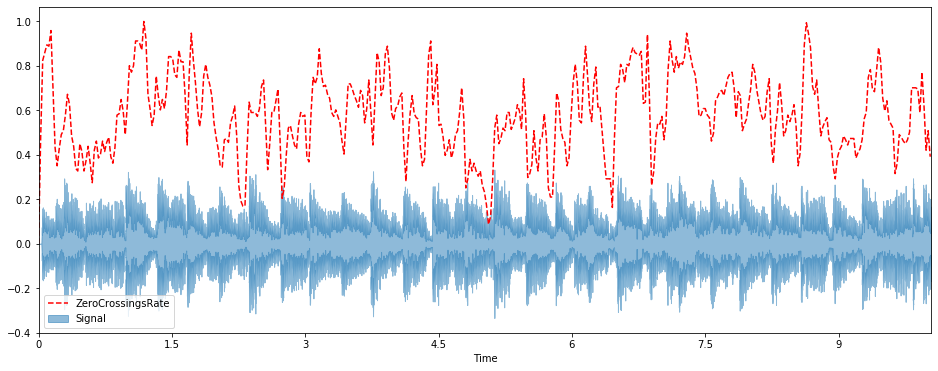

In [19]:
plotZeroCrossingWithWaveform(blues, bluesZC, bluesSR, 512)

### Zero crossing rate for classical recording:

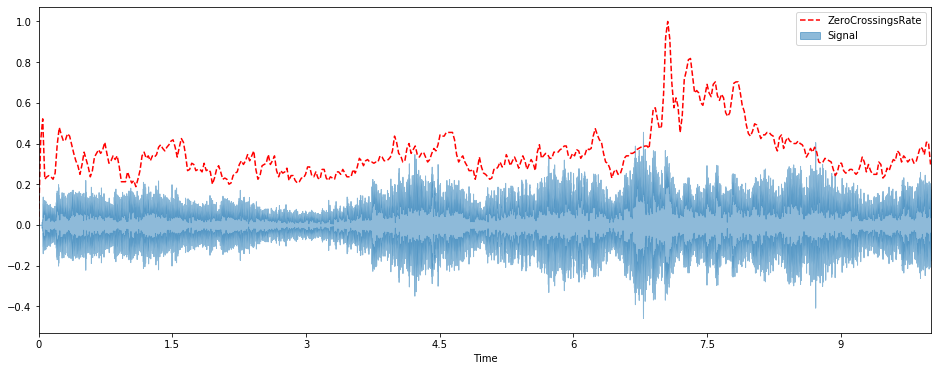

In [20]:
plotZeroCrossingWithWaveform(classical, classicalZC, classicalSR, 512)

## Frequency Domain Representation

Transforms our time-domain signal into the frequency domain.
Time domain expresses signal as a sequence of samples of different magnitude,
Frequency domain expresses our signal as a superposition frequencies.

### Fourier transform of continuous signal

Angualar frequency:
\begin{align}
\omega_x \equiv 2\pi xv
\end{align}

Fourier transformation:
\begin{align}
f(t)=\int _{-\infty}^{\infty}F(\omega_x)\,e^{-2\pi ixt}\,dx
\end{align}

### Fourier transform of discrete signal

\begin{align}
F_x = \sum_{n = - \frac{N}{2} + 1}^\frac{N}{2} f_n e^{(-i2\pi x)/N}
\end{align}

> On the Mathematics of Music: from Chords to Fourier Aanalysis
> -- <cite>Nathan Lenssen and Deanna Needell</cite>

In [27]:
def plotFourier(signal, sampleRate, freqRange):
    X = scipy.fft.fft(signal)
    X_mag = numpy.absolute(X)
    f = numpy.linspace(0, sampleRate, len(X_mag))
    plt.figure(figsize=(14, 5))
    plt.plot(f[:freqRange], X_mag[:freqRange])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

### Fourier transform of simple

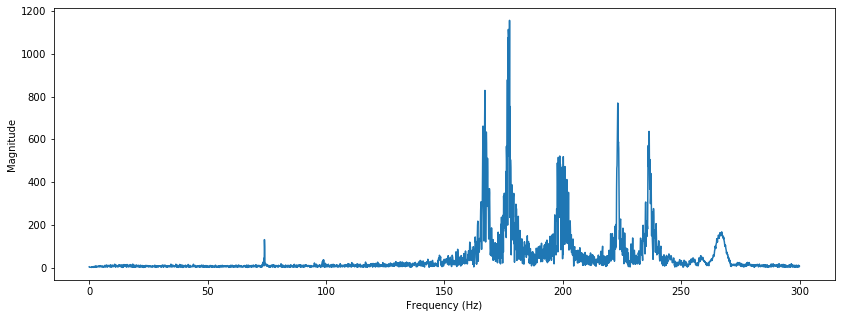

In [30]:
plotFourier(simple, simpleSR, 3000)

### Fourier transform of blues

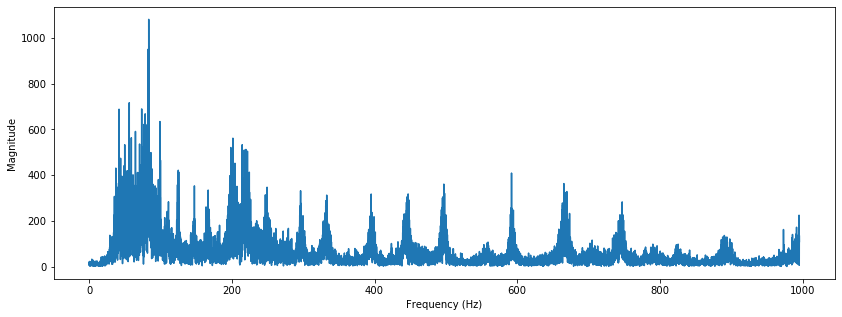

In [32]:
plotFourier(blues, bluesSR, 10000)

### Fourier transform of classical

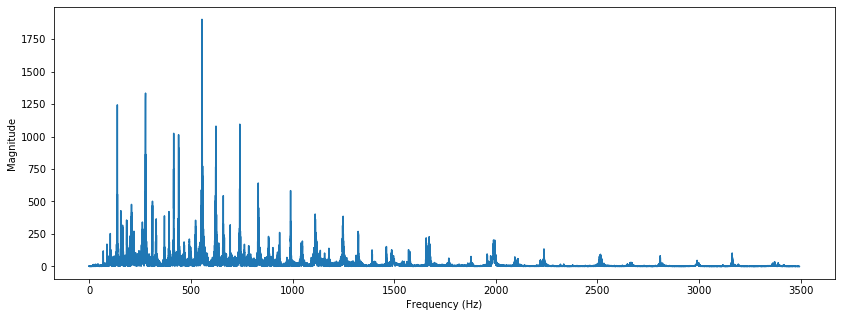

In [33]:
plotFourier(classical, classicalSR, 35000)

## Short-Time Fourier Transform and Spectrogram

### STFT

Reveals the frequency domain representation or spectrumof a small time interval of the input signal.

The STFT allows us to add a time dimension to the DFT which enables us to observe how the frequency domain changes over time.

\begin{align}
X(m, \omega) = \sum_n x(n) w(n-m) e^{-j \omega n}
\end{align}

### Spectrogram
Shows the the intensity of frequencies over time, is the squared magnitude of the STFT.
\begin{align}
S(m, \omega) = \left| X(m, \omega) \right|^2
\end{align}

In [35]:
def plotStftSpectogram(signal, sampleRate, segmentSize, hopSize):
    transform = librosa.stft(signal, n_fft=segmentSize, hop_length=hopSize)
    spectrogram = librosa.amplitude_to_db(abs(transform))
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(spectrogram, sr=sampleRate, hop_length=hopSize, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')

### Simple signal spectrogram

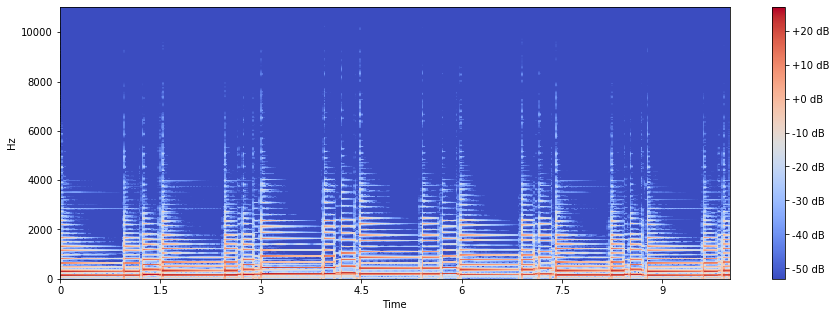

In [36]:
plotStftSpectogram(simple, simpleSR, 1024, 512)

### Blues signal spectrogram

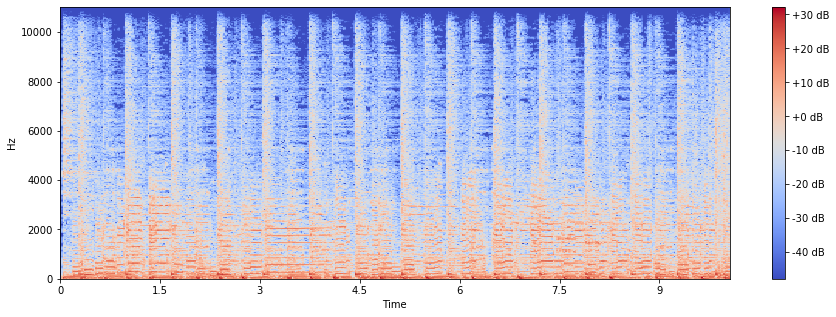

In [37]:
plotStftSpectogram(blues, bluesSR, 1024, 512)

### Classical signal spectrogram

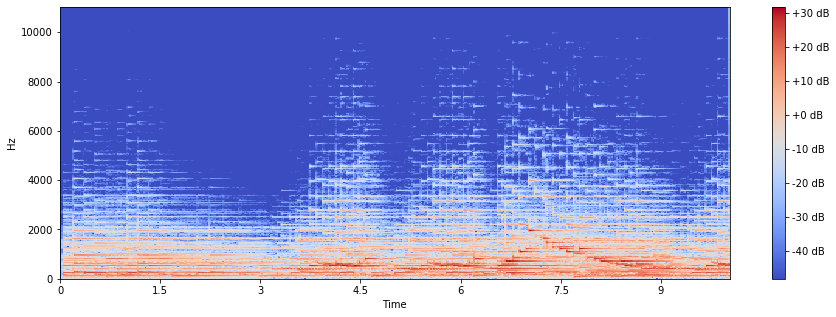

In [38]:
plotStftSpectogram(classical, classicalSR, 1024, 512)